## AT2: Solving a binary classification problem of Titanic passenger survival using SVM

> SVM(Support Vector Machine) is a supervised machine learning algorithm for solving classification or regression problem. It finds the optimal hyperplane that separates data points of various classes within the maximum margin. This can use different kernel functions and different parameters for making the model better, for handling both linear and non-linear data.

In this demo, these codes show how to solve a binary classification problem using SVM.

In summary, the problem is a binary classification made from Titanic.csv(source: https://www.openml.org/search?type=data&status=active&id=40945&sort=runs). which have a variety of features of each passenger on the Titanic. It has 1309 people's data. As the image below shows, it have 15 features.

Before we use this dataset, the main point is to preprocess the data correctly as it has both numercial quantitative and qualitative values. Furthermore, missing values "?" have to be changed. `id`, `name`, `ticket`, `home.dest` have little relation to the result and they are just the tag for differentiating the data. So these will be removed while doing classification. Other features which are numercial will be used well, and categorical features will be converted to numerical binary values. For handling missing values, numerical data was replaced with the median of each feature, and categorical data was replaced with the mode of each feature.

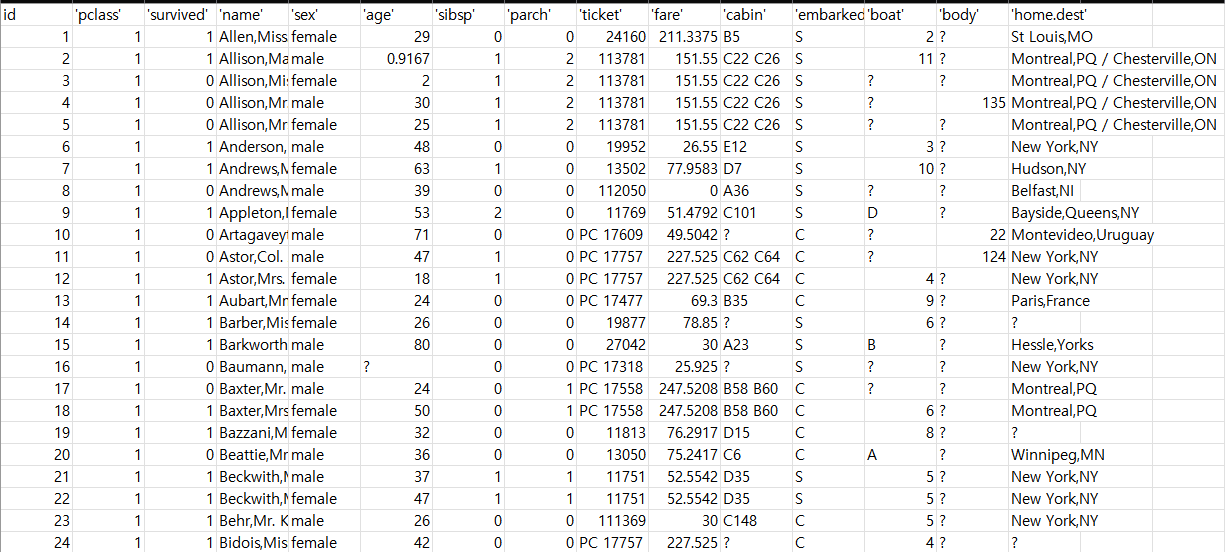

The goal is to predict each passenger's survival based on their features. This involves identifying patterns that indicate a higher or lower likelihood of survival during the Titanic disaster.

The solution is to use SVM(Support Vector Machine). SVM works by finding the optimal hyperplane that separates the data into classes, survival and dead. Our group member chose SVM compared to other supervised learning algorithms like Decision Tree and KNN, by evaluating each algorithm. And we found the best parameters of SVM by using GridSearchCV.

After training and testing, the model's performance is evaluated using a testing set.

# 1. Make a Dataset by loading Titanic Dataset and Preprocess the dataset

Import drive to connect the drive location with this colab file

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Set the location to current folder

In [ ]:
cd /content/drive/MyDrive/IntroAILab/group_project

/content/drive/MyDrive/IntroAILab/group_project


Import pandas for reading the Titanic.csv file

In [ ]:
import pandas as pd

Read the Titanic.csv file by using read_csv function.

Make the missing values from "?" to NaN by using na_values parameter.

In [ ]:
data = pd.read_csv('Titanic.csv', na_values='?')
data.head(10)

,id,'pclass','survived','name','sex','age','sibsp','parch','ticket','fare','cabin','embarked','boat','body','home.dest'
0,1,1,1,"Allen,Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis,MO"
1,2,1,1,"Allison,Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal,PQ / Chesterville,ON"
2,3,1,0,"Allison,Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal,PQ / Chesterville,ON"
3,4,1,0,"Allison,Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal,PQ / Chesterville,ON"
4,5,1,0,"Allison,Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal,PQ / Chesterville,ON"
5,6,1,1,"Anderson,Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York,NY"
6,7,1,1,"Andrews,Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson,NY"
7,8,1,0,"Andrews,Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast,NI"
8,9,1,1,"Appleton,Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside,Queens,NY"
9,10,1,0,"Artagaveytia,Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo,Uruguay"


Shape method returns the a tuple of the numbers of rows and columns. It have 1309 people's data, and 15 features.

In [ ]:
print(data.shape)

(1309, 15)


Refine the data variable by removing the unnecessary columns like `id`, `name`, `ticket`, and `home.dest`.

In [ ]:
data = data.drop("id", axis=1)
data = data.drop("'name'", axis=1)
data = data.drop("'ticket'", axis=1)
data = data.drop("'home.dest'", axis=1)
data.head(10)

,'pclass','survived','sex','age','sibsp','parch','fare','cabin','embarked','boat','body'
0,1,1,female,29.0000,0,0,211.3375,B5,S,2,NaN
1,1,1,male,0.9167,1,2,151.5500,C22 C26,S,11,NaN
2,1,0,female,2.0000,1,2,151.5500,C22 C26,S,NaN,NaN
3,1,0,male,30.0000,1,2,151.5500,C22 C26,S,NaN,135.0
4,1,0,female,25.0000,1,2,151.5500,C22 C26,S,NaN,NaN
5,1,1,male,48.0000,0,0,26.5500,E12,S,3,NaN
6,1,1,female,63.0000,1,0,77.9583,D7,S,10,NaN
7,1,0,male,39.0000,0,0,0.0000,A36,S,NaN,NaN
8,1,1,female,53.0000,2,0,51.4792,C101,S,D,NaN
9,1,0,male,71.0000,0,0,49.5042,NaN,C,NaN,22.0


Find the all missing values in the dataset by using isnull function from pandas library.

As the data shows, `age`, `fare`, `cabin`, `embarked`, `boat`, and `body` variables have NaN values. So we have to change these values to reasonable values for executing machine learning.

In [ ]:
data.isnull().sum()

,0
'pclass',0
'survived',0
'sex',0
'age',263
'sibsp',0
'parch',0
'fare',1
'cabin',1014
'embarked',2
'boat',823


For the training, we have to make a clean, organized dataset. This is the main process of handling the missing values.

Fill in the missing values in the `age`, `fare` and `body` columns with the median of each column, by using `fillna` function. As this is the numerical values, we used the median for filling the values.

For the categorical columns like `cabin`, `boat` and `embarked`, `mode()` function is used for putting the value that appears most often. By using `fillna()` function, the value is filled in the data.

In [ ]:
data[["'age'","'fare'", "'body'"]] = data[["'age'","'fare'", "'body'"]].fillna(data[["'age'","'fare'", "'body'"]].median())
data["'cabin'"].fillna(data["'cabin'"].mode()[0], inplace=True)
data["'boat'"].fillna(data["'boat'"].mode()[0], inplace=True)
data["'embarked'"].fillna(data["'embarked'"].mode()[0], inplace=True)

data.isnull().sum()

<ipython-input-8-74ec02a6d83b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["'cabin'"].fillna(data["'cabin'"].mode()[0], inplace=True)
<ipython-input-8-74ec02a6d83b>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

,0
'pclass',0
'survived',0
'sex',0
'age',0
'sibsp',0
'parch',0
'fare',0
'cabin',0
'embarked',0
'boat',0


Dropna function is used for removing the row of missing values. But as there was no missing row in this data, the sum of the isnull() data counts is the same as the previous state.

In [ ]:
data.dropna(inplace=True)
data.isnull().sum()

,0
'pclass',0
'survived',0
'sex',0
'age',0
'sibsp',0
'parch',0
'fare',0
'cabin',0
'embarked',0
'boat',0


Use get_dummies from pandas library for converting the categorical values to numerical values like int types.
`sex`, `embarked`, `cabin`, `boat` are the categorical values.

For using in the machine learning, it is necessary to change it to numerical values. Each column make new columns with 0 or 1 variables. It shows the true or false about the existence of this value.

For example, "sex" is converted to "sex"_female and "sex"_male. If the person is man, then "sex"_femal = 0 and "sex"_male = 1.

In [ ]:
data = pd.get_dummies(data, columns=["'sex'", "'embarked'", "'cabin'", "'boat'"], dtype=int)
data.head(10)

,'pclass','survived','age','sibsp','parch','fare','body','sex'_female,'sex'_male,'embarked'_C,...,'boat'_6,'boat'_7,'boat'_8,'boat'_8 10,'boat'_9,'boat'_A,'boat'_B,'boat'_C,'boat'_C D,'boat'_D
0,1,1,29.0000,0,0,211.3375,155.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0.9167,1,2,151.5500,155.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,2.0000,1,2,151.5500,155.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,30.0000,1,2,151.5500,135.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,25.0000,1,2,151.5500,155.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,1,48.0000,0,0,26.5500,155.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,1,1,63.0000,1,0,77.9583,155.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,0,39.0000,0,0,0.0000,155.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8,1,1,53.0000,2,0,51.4792,155.0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
9,1,0,71.0000,0,0,49.5042,22.0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


This is the process of normalization. If we use the current data, then there is a warning that some variables get a big influence to the result. By doing the normalization, all variables have the same scale, which prevents certain variables from having too large values.

Substract the minimum value from each value and divide by the difference between the max() and min() to scale the values in that column between 0 and 1.

In [ ]:
for column in data.columns:
    data[column] = (data[column] - data[column].min()) / (data[column].max() - data[column].min())

data.head(10)

,'pclass','survived','age','sibsp','parch','fare','body','sex'_female,'sex'_male,'embarked'_C,...,'boat'_6,'boat'_7,'boat'_8,'boat'_8 10,'boat'_9,'boat'_A,'boat'_B,'boat'_C,'boat'_C D,'boat'_D
0,0.0,1.0,0.361169,0.000,0.000000,0.412503,0.470948,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.009395,0.125,0.222222,0.295806,0.470948,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.022964,0.125,0.222222,0.295806,0.470948,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.373695,0.125,0.222222,0.295806,0.409786,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.311064,0.125,0.222222,0.295806,0.470948,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,1.0,0.599165,0.000,0.000000,0.051822,0.470948,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,1.0,0.787056,0.125,0.000000,0.152164,0.470948,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.486430,0.000,0.000000,0.000000,0.470948,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,1.0,0.661795,0.250,0.000000,0.100481,0.470948,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,0.0,0.0,0.887265,0.000,0.000000,0.096626,0.064220,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 2. Form the training and test dataset

This code start by importing the `train_test_split` function from the `model_selection` module of the `sklearn` library.
The function split the the existing dataset into training and testing set.

In [ ]:
from sklearn.model_selection import train_test_split

Define the X for all features except `survived`, and Y for the survived values

In [ ]:
X = data.drop("'survived'", axis=1)
y = data["'survived'"]



`test_size` is set to *0.2* meaning 20% of the dataset will be the testing set and 80% will be the training set. The `random_state` parameter is just a seed that can be use for reproducibility. The function then split the data accordingly.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Visualize the dataset with graphs

For the visualisation, we import the `matplotlib.pyplot` library, assigning it with the alias `plt`. This library provide various functions to visualise datasets like graphs. This is a small example of visualizing the whole data.



In [ ]:
import matplotlib.pyplot as plt

There are various numerical values but in this graph, we put `age`, `fare` for the input and `survived` for the output. This is the graph of X_train data.

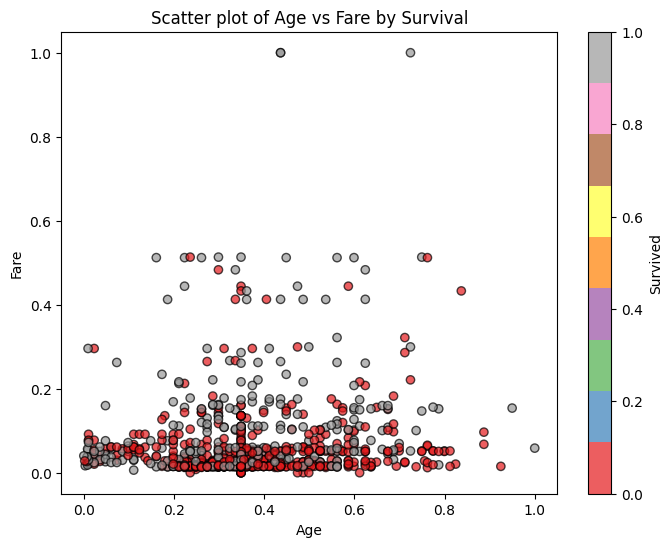

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X_train["'age'"], X_train["'fare'"], c=y_train, cmap=plt.cm.Set1, edgecolor="k", alpha=0.7)
plt.xlabel("Age")
plt.ylabel("Fare")
plt.title("Scatter plot of Age vs Fare by Survival")
plt.colorbar(label="Survived")
plt.show()

This is the graph of X_test data. We colored by survival by setting age and fare to X and Y axis.

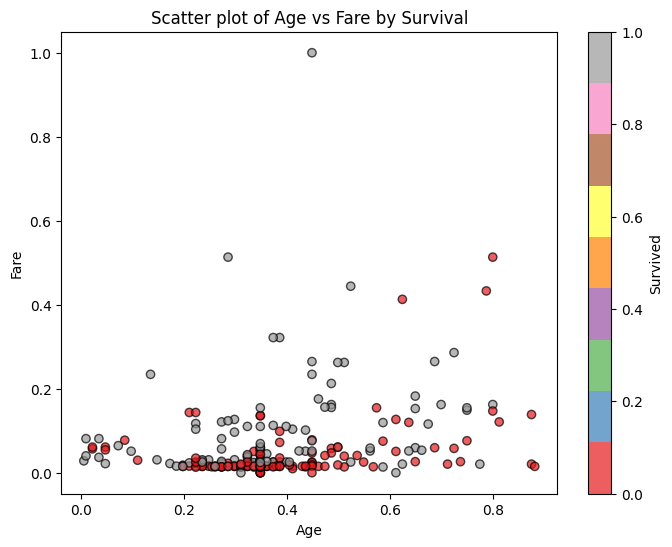

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X_test["'age'"], X_test["'fare'"], c=y_test, cmap=plt.cm.Set1, edgecolor="k", alpha=0.7)
plt.xlabel("Age")
plt.ylabel("Fare")
plt.title("Scatter plot of Age vs Fare by Survival")
plt.colorbar(label="Survived")
plt.show()

# 4. Process of choosing the best algorithm and parameters

This is the process of choosing the best algorithm. We found the supervised learning algorithms which are SVM, KNN, and the decision tree. The standard of the performance is the accuracy score for comparing each algorithm.

Each model is trained by using `model.fit` and predicted by `model.predict`. If the accuracy score is the biggest, then `best_model_name` and `best_model_score` are changed.

We made an assumption that Support Vector Machine(SVM) can be useful for covering Titanic dataset. SVM is absolutely good at processing the high dimensional data. Also, it has kernel function so that it can process both linear and non-linear data. It is good at preventing overfitting.

Same as the assumption, SVM made the best performance for the accuracy score compared to other techniques.

In [ ]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Make each classifier for supervised learning
svm_test = SVC()
knn_test = KNeighborsClassifier(n_neighbors = 3)
dc_test = DecisionTreeClassifier(random_state=11)


# Put the classifers into the dictionary with key(name of the algorithm)
models = {
    "SVM": svm_test,
    "KNN": knn_test,
    "Decision Tree": dc_test
}


# Initialize the best model name and the best model accuracy score
best_model_name = None
best_model_score = 0.0


# Train the model and predict the test data, followed by the accuracy score
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{model_name} Accuracy: {accuracy:.3f}')
    if accuracy > best_model_score:
        best_model_score = accuracy
        best_model_name = model_name


print(f'\nBest Model is {best_model_name} with the accuracy score {best_model_score:.3f}')

SVM Accuracy: 0.954
KNN Accuracy: 0.924
Decision Tree Accuracy: 0.943

Best Model is SVM with the accuracy score 0.954


This is the process of finding the best parameters. `GridsearchCV` is used for doing this. the candidates of paramters are total 100 fits. After doing the cross validation with various parameters, `grid.best_params` outputs the best parameters.

In [ ]:
# codes below were cited from https://www.geeksforgeeks.org/svm-hyperparameter-tuning-using-gridsearchcv-ml/, "Use GridsearchCV" part
from sklearn.model_selection import GridSearchCV

# Define parameter ranges. 'C', 'gamma' are the objective parameters.
param_grid = {'C': [0.1, 1, 2, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf']}

# Make a Grid object
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 1)

# Fit the model for grid search
grid.fit(X_train, y_train)


# Print best parameter after tuning
print("Best parameter: ", grid.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameter:  {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}


# 5. Train the dataset with SVM

Call the constructor `SVC()` to create a SVC object, name it as `model`, by passing the following some main key parameters:

- `C`: Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive.
    - Default=1.0
- `kernel`: Specifies the kernel type to be used in the algorithm. possible values are `linear`, `poly`, `rbf`, `sigmoid` and `precomputed`.
   - Default is `rbf`.
- `gamma`: Kernel coefficient for `rbf`, `poly` and `sigmoid`.
    - Possible values are `scale` ($1 \div $ (`n_features` $\times$ `X.var()`)) and `auto` ($1 \div $ `n_features`).
    - Default is `scale`.

In [ ]:
from sklearn.svm import SVC
model = SVC(C=0.1, gamma=0.1, kernel='rbf')
model.fit(X_train, y_train)

SVC(C=0.1, gamma=0.1)

# 6. Test the dataset and evaluate the model

Import metrics, and accuracy_score for verifying the results of prediction.
Import ConfusionMatrixDisplay, and confusion_matrix to show the relations using the matrix.

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

Test the classification model's performance using the method `predict()` to calculate the predicted values of test data and store the values in a variable, `y_pred`, and use a number of measures to evaluate the performance of this model.

In [ ]:
y_pred = model.predict(X_test)

Calculate the accuracy score using the function accuracy_score.

In [ ]:
score_test = accuracy_score(y_test, y_pred)
print (score_test)

0.9541984732824428


Calculate the precision score using the function precision_score in metrics.

In [ ]:
precision_test = metrics.precision_score(y_test, y_pred, average='weighted')
print (precision_test)

0.9577216676453318


Calculate the recall score using the function recall_score in metrics.

In [ ]:
recall_test = metrics.recall_score(y_test, y_pred, average='weighted')
print (recall_test)

0.9541984732824428


Calculate the F1 score using the function f1_score in metrics.

In [ ]:
f1_test = metrics.f1_score(y_test, y_pred, average='weighted')
print(f1_test)

0.953887677208288


Show the confusion matrix with three labels by using ConfusionMatrix function. Plot the data with x axis(predicted label), and y axis(true label). If the data is gathered in a diagonal part, it means the model is perfect for predicting labels.

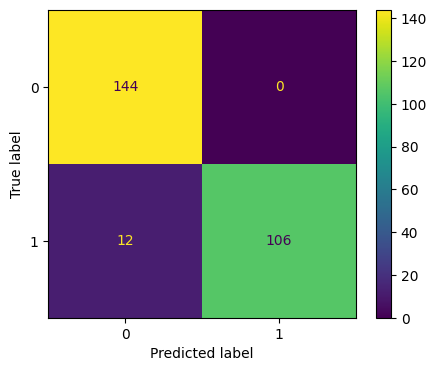

In [ ]:
fig,ax = plt.subplots(figsize=(5,4),dpi = 100)
cm = confusion_matrix(y_test, y_pred)
cmp = ConfusionMatrixDisplay(cm)
cmp.plot(ax = ax);

Show the overall report by using classification_report function in metrics.
Overall, scores are almost 95%. So we can say the performance of this model is really great.

In [ ]:
report = metrics.classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96       144
         1.0       1.00      0.90      0.95       118

    accuracy                           0.95       262
   macro avg       0.96      0.95      0.95       262
weighted avg       0.96      0.95      0.95       262

